In [43]:
!gdown --fuzzy https://drive.google.com/file/d/1QJrQsEYOfPBn1LoIeYMZ2HFBRC0AY-6F/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1zStcaVl_34RrYIfVObuM4xzB6s8xwvBi/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1QJrQsEYOfPBn1LoIeYMZ2HFBRC0AY-6F
To: /content/dataset.py
100% 909/909 [00:00<00:00, 3.36MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zStcaVl_34RrYIfVObuM4xzB6s8xwvBi
To: /content/Data_hoda_full.mat
100% 3.99M/3.99M [00:00<00:00, 259MB/s]


In [44]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,  Activation
from dataset import load_hoda

In [46]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

In [45]:
# Preprocess input data for Keras.
x_train = np.array(x_train_original)
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
x_test = np.array(x_test_original)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [47]:
def print_data_info(x_train, y_train, x_test, y_test):
    #Check data Type
    print ("\ttype(x_train): {}".format(type(x_train)))
    print ("\ttype(y_train): {}".format(type(y_train)))

    #check data Shape
    print ("\tx_train.shape: {}".format(np.shape(x_train)))
    print ("\ty_train.shape: {}".format(np.shape(y_train)))
    print ("\tx_test.shape: {}".format(np.shape(x_test)))
    print ("\ty_test.shape: {}".format(np.shape(y_test)))

    #sample data
    print ("\ty_train[0]: {}".format(y_train[0]))

In [48]:
print("Before Preprocessing:")
print_data_info(x_train_original, y_train_original, x_test_original, y_test_original)
print("After Preprocessing:")
print_data_info(x_train, y_train, x_test, y_test)

Before Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000,)
	x_test.shape: (200, 25)
	y_test.shape: (200,)
	y_train[0]: 6
After Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000, 10)
	x_test.shape: (200, 25)
	y_test.shape: (200, 10)
	y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [49]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [50]:
# In this Create the model, input dim=25 and output dim = 10

##################################
# you code here
##################################
# model = ...
model = Sequential([Dense(10, input_dim=25, name='layer'),Activation('softmax', name='softmax_active')], name='hoda_model')

In [51]:
model.summary()

Model: "hoda_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer (Dense)               (None, 10)                260       
                                                                 
 softmax_active (Activation  (None, 10)                0         
 )                                                               
                                                                 
Total params: 260 (1.02 KB)
Trainable params: 260 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
# In this cell compile mode, set loss function and optimizer and get metrics accuracy

##################################
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# you code here
##################################

In [53]:
MLP_model = model.fit(x_train, y_train,
          epochs=100,
          batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 2.5492 - accuracy: 0.1550 - val_loss: 2.4507 - val_accuracy: 0.1600
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 2.4304 - accuracy: 0.1660 - val_loss: 2.3541 - val_accuracy: 0.1700
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 2.3241 - accuracy: 0.1750 - val_loss: 2.2675 - val_accuracy: 0.1850
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 2.2297 - accuracy: 0.1960 - val_loss: 2.1879 - val_accuracy: 0.2050
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 2.1430 - accuracy: 0.2160 - val_loss: 2.1180 - val_accuracy: 0.2100
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 2.0669 - accuracy: 0.2410 - val_loss: 2.0519 - val_accuracy: 0.2400
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 1.9958 - accuracy: 0.2780 - val_loss: 1.9913 - val_accuracy: 0.2850
Epoch 8/100


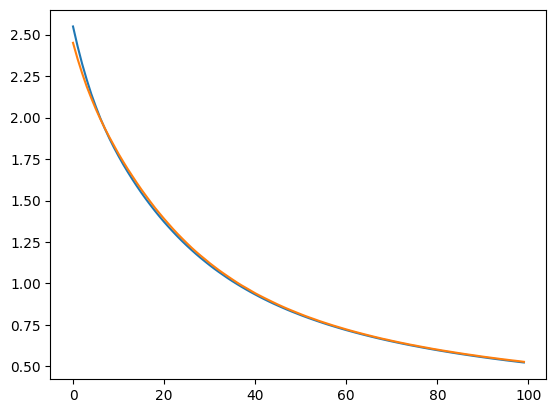

In [54]:
# plot Loss
plt.plot(MLP_model.history["loss"])
plt.plot(MLP_model.history["val_loss"])

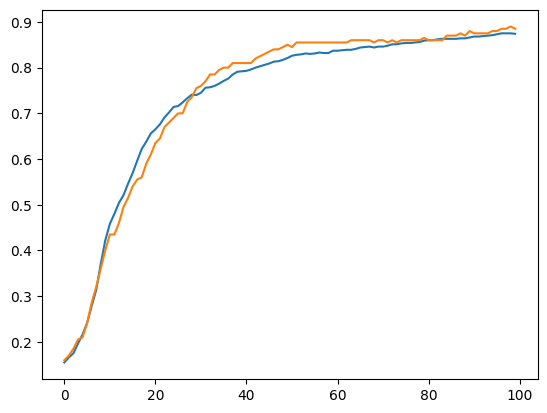

In [55]:
# plot accuracy
plt.plot(MLP_model.history["accuracy"])
plt.plot(MLP_model.history["val_accuracy"])